## Section One - Logistic Regression

### <div class="alert alert-info"></div>
Please realize the __logistic regression__ algorithm from scratch. Similar to the example demonstrated in the lecture.

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generating a dataset
X, Y = make_classification(n_samples=2000, n_features=10, n_classes=2, random_state=42)
Y = Y.reshape((Y.shape[0], 1))

#Now lets split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train = X_train.T
Y_train = Y_train.T
X_test = X_test.T
Y_test = Y_test.T

#Creating functions as required
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize_w(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

def propagate(w, b, X, Y):
    m = X.shape[1]
    

    A = sigmoid(np.dot(w.T, X) + b)
    cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    

    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)
    
    grads = {"dw": dw, "db": db}
    cost = np.squeeze(cost)
    
    return grads, cost



def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        
    
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print(f"Cost after iteration {i}: {cost}")
    
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs



def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    return Y_prediction


def logistic_regression(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_w(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    print(f"train accuracy: {100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100} %")
    print(f"test accuracy: {100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100} %")
    
    results = {
        "costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations
    }
    
    return results


results = logistic_regression(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=True)




Cost after iteration 0: 0.6931471805599452
Cost after iteration 100: 0.25726046142422815
Cost after iteration 200: 0.25719855984496287
Cost after iteration 300: 0.25719825294219223
Cost after iteration 400: 0.25719825130634527
Cost after iteration 500: 0.25719825129757573
Cost after iteration 600: 0.2571982512975288
Cost after iteration 700: 0.25719825129752844
Cost after iteration 800: 0.25719825129752844
Cost after iteration 900: 0.25719825129752827
Cost after iteration 1000: 0.25719825129752844
Cost after iteration 1100: 0.2571982512975282
Cost after iteration 1200: 0.2571982512975283
Cost after iteration 1300: 0.2571982512975283
Cost after iteration 1400: 0.2571982512975283
Cost after iteration 1500: 0.2571982512975283
Cost after iteration 1600: 0.2571982512975283
Cost after iteration 1700: 0.2571982512975283
Cost after iteration 1800: 0.2571982512975283
Cost after iteration 1900: 0.2571982512975283
train accuracy: 89.3125 %
test accuracy: 89.5 %


### <div class="alert alert-info"></div>
Please test the homemade __logistic regression__ algorithm in section 1.1. The dataset can be loaded from __sklearn.datasets.load_breast_cancer__. The test size should be __25%__, while random state equals to __80493__. Please show the confusion matrix for both training and testing set, then calculate corresponding recall.  

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score

# Lets load the breast cancer dataset
data = load_breast_cancer()
X = data.data
Y = data.target.reshape((data.target.shape[0], 1))

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=80493)


X_train = X_train.T
Y_train = Y_train.T
X_test = X_test.T
Y_test = Y_test.T

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize_w(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

def propagate(w, b, X, Y):
    m = X.shape[1]
    

    A = sigmoid(np.dot(w.T, X) + b)
    cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    

    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)
    
    grads = {"dw": dw, "db": db}
    cost = np.squeeze(cost)
    
    return grads, cost

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        
        # Update weights
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print(f"Cost after iteration {i}: {cost}")
    
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs

def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    return Y_prediction

def logistic_regression(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_w(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    print(f"train accuracy: {100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100} %")
    print(f"test accuracy: {100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100} %")
    
    results = {
        "costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations
    }
    
    return results


results = logistic_regression(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=True)


Y_pred_train = results["Y_prediction_train"]
Y_pred_test = results["Y_prediction_test"]

# Creating a confusion matrix
c_matrix_train = confusion_matrix(Y_train.flatten(), Y_pred_train.flatten())
c_matrix_test = confusion_matrix(Y_test.flatten(), Y_pred_test.flatten())

# Recall
recall_train = recall_score(Y_train.flatten(), Y_pred_train.flatten())
recall_test = recall_score(Y_test.flatten(), Y_pred_test.flatten())




Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: nan
Cost after iteration 200: nan
Cost after iteration 300: nan
Cost after iteration 400: nan
Cost after iteration 500: nan
Cost after iteration 600: nan
Cost after iteration 700: nan
Cost after iteration 800: nan
Cost after iteration 900: nan
Cost after iteration 1000: nan
Cost after iteration 1100: nan
Cost after iteration 1200: nan
Cost after iteration 1300: nan
Cost after iteration 1400: nan
Cost after iteration 1500: nan
Cost after iteration 1600: nan
Cost after iteration 1700: nan
Cost after iteration 1800: nan
Cost after iteration 1900: nan
train accuracy: 91.31455399061034 %
test accuracy: 88.81118881118881 %


/var/folders/ct/zh551fgd0tl4qpqj97d4yxb80000gn/T/ipykernel_14492/2385309381.py:23: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/ct/zh551fgd0tl4qpqj97d4yxb80000gn/T/ipykernel_14492/2385309381.py:35: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
/var/folders/ct/zh551fgd0tl4qpqj97d4yxb80000gn/T/ipykernel_14492/2385309381.py:35: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))


### <div class="alert alert-info"></div>
Please compare the results in 1.2 to the model using __sklearn.linear_model.LogisticRegression__

Please show the confusion matrix for both training and testing set, then calculate corresponding recall.

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.linear_model import LogisticRegression

# Lets load the breast cancer dataset
data = load_breast_cancer()
X = data.data
Y = data.target.reshape((data.target.shape[0], 1))

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=80493)


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize_w(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

def propagate(w, b, X, Y):
    m = X.shape[1]
    

    A = sigmoid(np.dot(w.T, X) + b)
    cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    

    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)
    
    grads = {"dw": dw, "db": db}
    cost = np.squeeze(cost)
    
    return grads, cost

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        

        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print(f"Cost after iteration {i}: {cost}")
    
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs

def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    return Y_prediction

def logistic_regression(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_w(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    print(f"train accuracy: {100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100} %")
    print(f"test accuracy: {100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100} %")
    
    results = {
        "costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations
    }
    
    return results


results = logistic_regression_model(X_train.T, Y_train.T, X_test.T, Y_test.T, num_iterations=2000, learning_rate=0.5, print_cost=True)


Y_pred_train = results["Y_prediction_train"]
Y_pred_test = results["Y_prediction_test"]

# Confusion matrix and recall it
c_matrix_train = confusion_matrix(Y_train.flatten(), Y_pred_train.flatten())
c_matrix_test = confusion_matrix(Y_test.flatten(), Y_pred_test.flatten())
recall_train = recall_score(Y_train.flatten(), Y_pred_train.flatten())
recall_test = recall_score(Y_test.flatten(), Y_pred_test.flatten())

print("Homemade Logistic Regression")
print("Confusion Matrix (Training):\n", c_matrix_train)
print("Recall (Training):", recall_train)
print("Confusion Matrix (Testing):\n", c_matrix_test)
print("Recall (Testing):", recall_test)

# Training logistic regression model 
clf = LogisticRegression(max_iter=2000, random_state=80493)
clf.fit(X_train, Y_train.ravel())


Y_pred_train_sklearn = clf.predict(X_train)
Y_pred_test_sklearn = clf.predict(X_test)

# Confusion matrix and recall for sklearn model
c_matrix_train_sklearn = confusion_matrix(Y_train, Y_pred_train_sklearn)
c_matrix_test_sklearn = confusion_matrix(Y_test, Y_pred_test_sklearn)
recall_train_sklearn = recall_score(Y_train, Y_pred_train_sklearn)
recall_test_sklearn = recall_score(Y_test, Y_pred_test_sklearn)

print("\nSklearn Logistic Regression")
print("Confusion Matrix (Training) - Sklearn:\n", c_matrix_train_sklearn)
print("Recall (Training) - Sklearn:", recall_train_sklearn)
print("Confusion Matrix (Testing) - Sklearn:\n", c_matrix_test_sklearn)
print("Recall (Testing) - Sklearn:", recall_test_sklearn)


Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: nan
Cost after iteration 200: nan
Cost after iteration 300: nan
Cost after iteration 400: nan
Cost after iteration 500: nan
Cost after iteration 600: nan
Cost after iteration 700: nan
Cost after iteration 800: nan
Cost after iteration 900: nan
Cost after iteration 1000: nan
Cost after iteration 1100: nan
Cost after iteration 1200: nan
Cost after iteration 1300: nan
Cost after iteration 1400: nan
Cost after iteration 1500: nan
Cost after iteration 1600: nan
Cost after iteration 1700: nan
Cost after iteration 1800: nan
Cost after iteration 1900: nan
train accuracy: 91.31455399061034 %
test accuracy: 88.81118881118881 %
Homemade Logistic Regression
Confusion Matrix (Training):
 [[150  15]
 [ 22 239]]
Recall (Training): 0.9157088122605364
Confusion Matrix (Testing):
 [[41  6]
 [10 86]]
Recall (Testing): 0.8958333333333334


/var/folders/ct/zh551fgd0tl4qpqj97d4yxb80000gn/T/ipykernel_14492/2767642920.py:19: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/ct/zh551fgd0tl4qpqj97d4yxb80000gn/T/ipykernel_14492/2767642920.py:31: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
/var/folders/ct/zh551fgd0tl4qpqj97d4yxb80000gn/T/ipykernel_14492/2767642920.py:31: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))



Sklearn Logistic Regression
Confusion Matrix (Training) - Sklearn:
 [[158   7]
 [  6 255]]
Recall (Training) - Sklearn: 0.9770114942528736
Confusion Matrix (Testing) - Sklearn:
 [[40  7]
 [ 3 93]]
Recall (Testing) - Sklearn: 0.96875


## Section Two - Decision Tree
### <div class="alert alert-info"></div>
Given following 14 samples from a computer buying dataset, please find the __root node__ building a decision tree among four attributes __{Age, Income, Student, Credit_rating}__. Please show the calculation which supports your decison. Please calculate information gain for each scenario. 
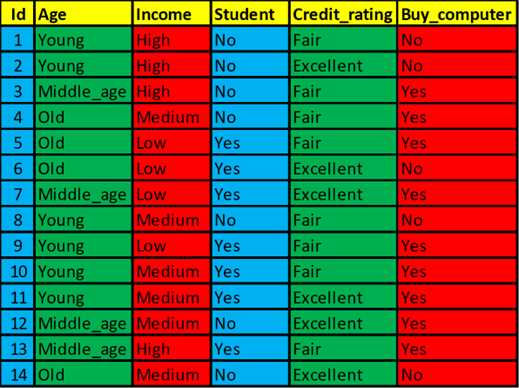

In [ ]:

import numpy as np
import pandas as pd


data = {
    'Age': ['Young', 'Young', 'Middle_age', 'Old', 'Old', 'Old', 'Middle_age', 'Young', 'Young', 'Young', 'Young', 'Middle_age', 'Middle_age', 'Old'],
    'Income': ['High', 'High', 'High', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium'],
    'Student': ['No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No'],
    'CreditRating': ['Fair', 'Excellent', 'Fair', 'Fair', 'Fair', 'Excellent', 'Excellent', 'Fair', 'Fair', 'Fair', 'Excellent', 'Excellent', 'Fair', 'Excellent'],
    'BuyComputer': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Creating a function to calculate entropy
def calculate_entropy(proportion):
    return -proportion * np.log2(proportion) if proportion != 0 else 0

# Calculating the entropy 
def calculate_total_entropy(dataframe, target_column):
    total_count = len(dataframe)
    positive_count = len(dataframe[dataframe[target_column] == 'Yes'])
    negative_count = len(dataframe[dataframe[target_column] == 'No'])
    proportion_positive = positive_count / total_count
    proportion_negative = negative_count / total_count
    return calculate_entropy(proportion_positive) + calculate_entropy(proportion_negative)

# Calculating the entropy for each attribute
def calculate_attribute_entropy(dataframe, attribute, target_column):
    total_count = len(dataframe)
    unique_values = dataframe[attribute].unique()
    attribute_entropy = 0
    for value in unique_values:
        subset = dataframe[dataframe[attribute] == value]
        subset_entropy = calculate_total_entropy(subset, target_column)
        attribute_entropy += (len(subset) / total_count) * subset_entropy
    return attribute_entropy

# Calculating the information gain for each attribute
def calculate_information_gain(dataframe, attribute, target_column):
    total_entropy = calculate_total_entropy(dataframe, target_column)
    attribute_entropy = calculate_attribute_entropy(dataframe, attribute, target_column)
    return total_entropy - attribute_entropy


target_column = 'BuyComputer'


attributes = ['Age', 'Income', 'Student', 'CreditRating']

# Calculating information gain for each attribute
information_gain_values = {attribute: calculate_information_gain(df, attribute, target_column) for attribute in attributes}
information_gain_values


{'Age': 0.22600024438491695,
 'Income': 0.02922256565895487,
 'Student': 0.15183550136234159,
 'CreditRating': 0.04812703040826949}

In [12]:
#determining the root node

root_node = max(information_gain_values, key=information_gain_values.get)
print(f'The root node is: {root_node}')


The root node is: Age
